In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\data work chinar\Final project\loan_prediction.csv", index_col='Loan_ID')

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


we see 614 rows and 13 columns we have 8 object and 5 numerical columns0 we also see there are multiple missing values

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


we see mean is greater than median for Applicant income, Co applicant income and Loan amount we also see high std dev for the same.The data has skewness and outliers


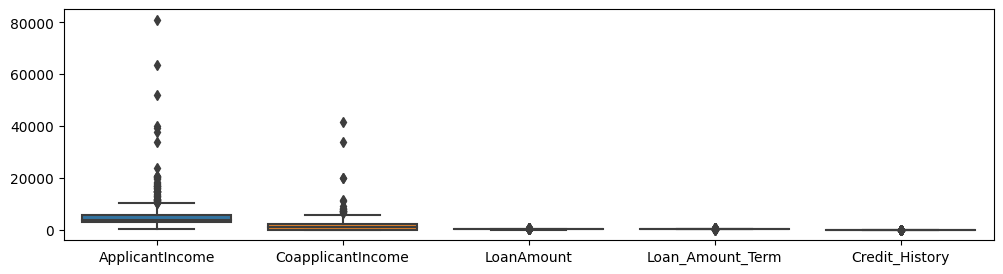

In [7]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df)
plt.show();

In [8]:
df.columns=df.columns.str.lower()
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [9]:
df.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [10]:
df.dtypes

gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

working on missing values

In [11]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df['married'].fillna(df['married'].mode()[0],inplace=True)

In [12]:
df['dependents'].fillna(df['dependents'].mode()[0],inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)

In [13]:
df['loanamount'] = df['loanamount'].fillna(df['loanamount'].mean()).astype(float)
df['loan_amount_term'].ffill(inplace=True)
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].mean()).astype(float)

filling the missing values above 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [15]:
df1=df[['applicantincome','coapplicantincome','loanamount','loan_amount_term','credit_history']]

In [16]:
df1

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
Loan_ID,,,,,
LP001002,5849,0.0,146.412162,360.0,1.0
LP001003,4583,1508.0,128.000000,360.0,1.0
LP001005,3000,0.0,66.000000,360.0,1.0
LP001006,2583,2358.0,120.000000,360.0,1.0
LP001008,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
LP002978,2900,0.0,71.000000,360.0,1.0
LP002979,4106,0.0,40.000000,180.0,1.0
LP002983,8072,240.0,253.000000,360.0,1.0


we removing the missing values we will now work on removing the outliers and skewness

In [17]:
from scipy.stats import zscore

In [18]:
#creating a function to choose right threshold
def threhold(z,d):
    for i in np.arange(3,5,0.3):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [19]:
z=np.abs(zscore(df1))
threhold(z,df1)

With threshold 3.0 data loss is 6.03%
With threshold 3.3 data loss is 5.37%
With threshold 3.6 data loss is 4.72%
With threshold 3.9 data loss is 4.72%
With threshold 4.2 data loss is 3.26%
With threshold 4.5 data loss is 2.77%
With threshold 4.8 data loss is 2.28%


In [20]:
df=df[(z<4.8).all(axis=1)]

In [21]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [22]:
df1.skew()

applicantincome      6.539513
coapplicantincome    7.491531
loanamount           2.726601
loan_amount_term    -2.293829
credit_history      -1.963600
dtype: float64

In [23]:
df['applicantincome'] = np.log(df['applicantincome'])
#df['coapplicantincome'] = np.log(df['coapplicantincome'])
df['loanamount'] = np.log(df['loanamount'])
#df['loan_amount_term'] = np.log(df['loan_amount_term'])
#df['credit_history'] = np.log(df['credit_history'])

In [24]:
df1.skew()

applicantincome      6.539513
coapplicantincome    7.491531
loanamount           2.726601
loan_amount_term    -2.293829
credit_history      -1.963600
dtype: float64

In [25]:
df.skew()

applicantincome      0.013782
coapplicantincome    1.689479
loanamount          -0.526824
loan_amount_term    -2.317309
credit_history      -1.965243
dtype: float64

only removed the skewness for applicant income and all the others were getting impacted negatively 

analysis uni/bi variate for vizual understanding 

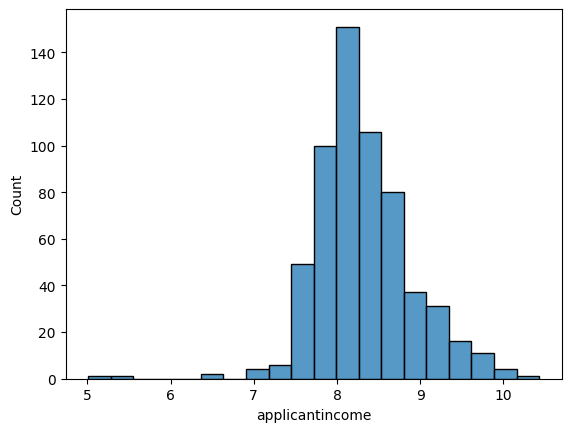

In [26]:
sns.histplot(data=df,x='applicantincome',bins=20);

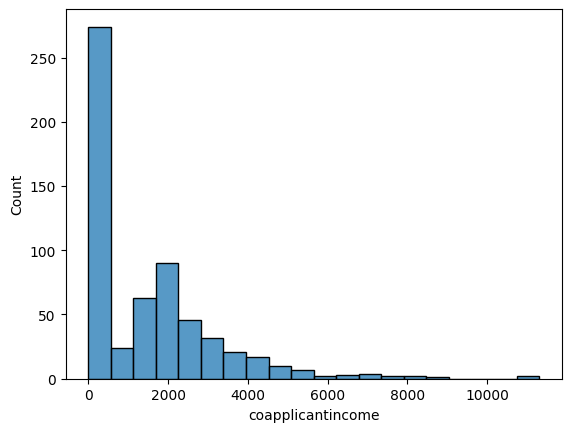

In [27]:
sns.histplot(data=df,x='coapplicantincome',bins=20);

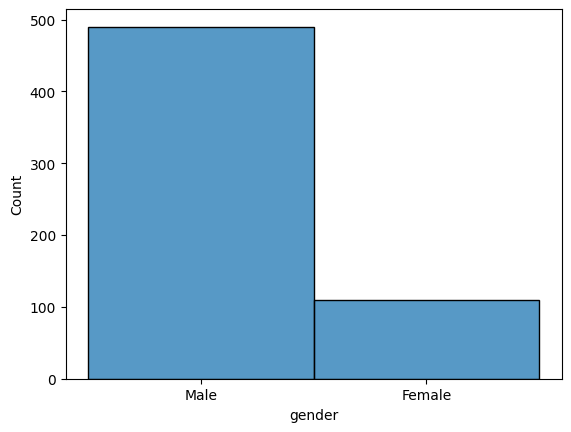

In [28]:
sns.histplot(data=df,x='gender',bins=20);

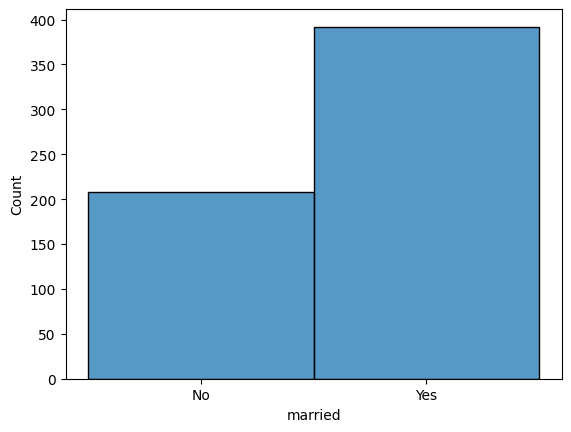

In [29]:
sns.histplot(data=df,x='married',bins=20);

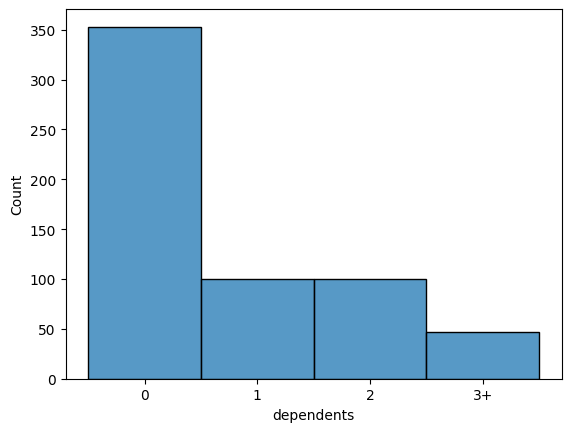

In [30]:
sns.histplot(data=df,x='dependents',bins=20);

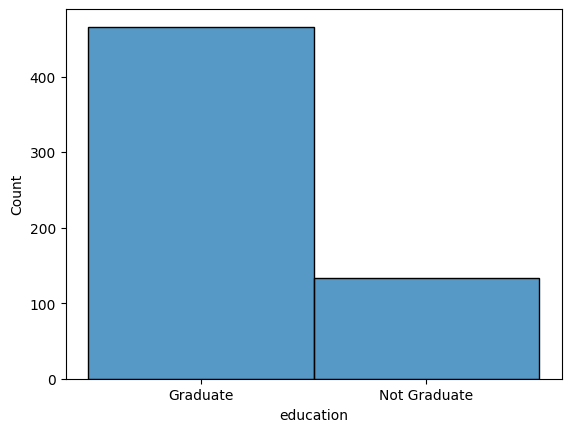

In [31]:
sns.histplot(data=df,x='education',bins=20);

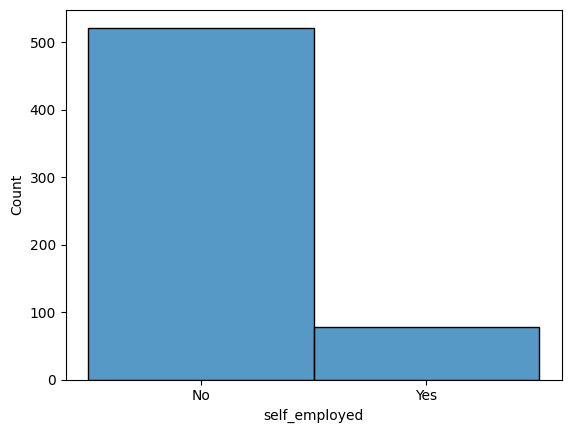

In [32]:
sns.histplot(data=df,x='self_employed',bins=20);

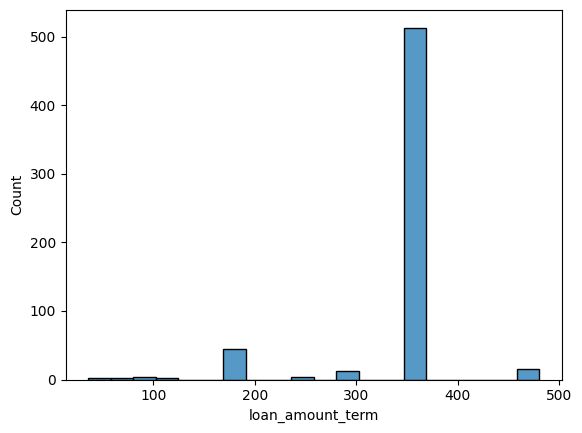

In [33]:
sns.histplot(data=df,x='loan_amount_term',bins=20);

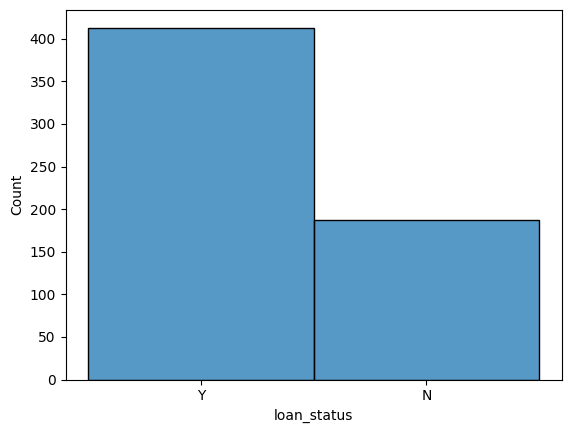

In [34]:
sns.histplot(data=df,x='loan_status',bins=20);

In [35]:
df['loan_status'].value_counts()

Y    413
N    187
Name: loan_status, dtype: int64

In [36]:
df['loan_status'].value_counts()*100/df['loan_status'].count()

Y    68.833333
N    31.166667
Name: loan_status, dtype: float64

as ther is no balance in the dependent variable we will have to use the SMOTE technique

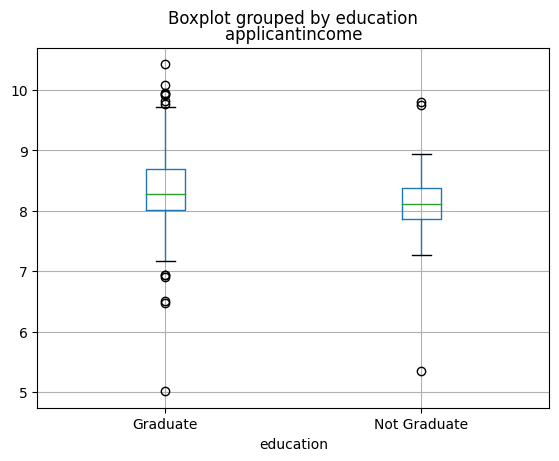

In [37]:
df.boxplot(column='applicantincome',by="education");

here we see that graduates have higer income compared to non graduates

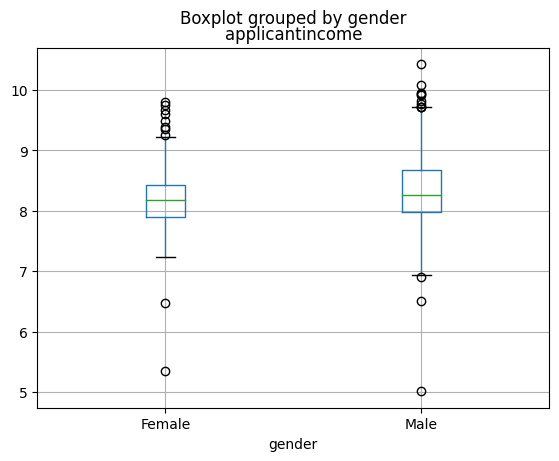

In [38]:
df.boxplot(column='applicantincome',by="gender");

males have higer salaries

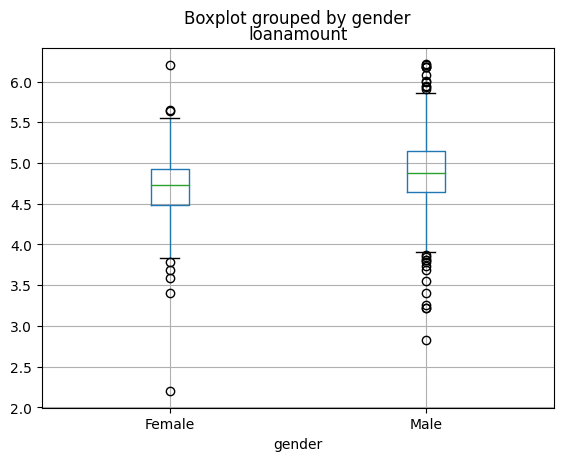

In [39]:
df.boxplot(column='loanamount',by="gender");

# Training the model

In [40]:
import sklearn
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix,accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn import metrics
import datetime
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [41]:
df.dtypes

gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [42]:
le= LabelEncoder()

In [43]:
df['gender'] = le.fit_transform(df['gender'])
df['married'] = le.fit_transform(df['married'])
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['property_area'] = le.fit_transform(df['property_area'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['dependents'] = le.fit_transform(df['dependents'])

In [44]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2,1
LP001003,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0,0
LP001005,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2,1
LP001006,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2,1
LP001008,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0,1
LP002979,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0,1
LP002983,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             600 non-null    int32  
 1   married            600 non-null    int32  
 2   dependents         600 non-null    int32  
 3   education          600 non-null    int32  
 4   self_employed      600 non-null    int32  
 5   applicantincome    600 non-null    float64
 6   coapplicantincome  600 non-null    float64
 7   loanamount         600 non-null    float64
 8   loan_amount_term   600 non-null    float64
 9   credit_history     600 non-null    float64
 10  property_area      600 non-null    int32  
 11  loan_status        600 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 60.7+ KB


In [46]:
X=df.iloc[:,:-1]
X

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,8.674026,0.0,4.986426,360.0,1.0,2
LP001003,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1.0,0
LP001005,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1.0,2
LP001006,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1.0,2
LP001008,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,7.972466,0.0,4.262680,360.0,1.0,0
LP002979,1,1,3,0,0,8.320205,0.0,3.688879,180.0,1.0,0
LP002983,1,1,1,0,0,8.996157,240.0,5.533389,360.0,1.0,2


Scaling the data 

In [47]:
ss=StandardScaler()
x=ss.fit_transform(X)
x

array([[ 0.47380354, -1.37281295, -0.73569618, ...,  0.27365108,
         0.45017668,  1.23279633],
       [ 0.47380354,  0.72843136,  0.265251  , ...,  0.27365108,
         0.45017668, -1.30905177],
       [ 0.47380354,  0.72843136, -0.73569618, ...,  0.27365108,
         0.45017668,  1.23279633],
       ...,
       [ 0.47380354,  0.72843136,  0.265251  , ...,  0.27365108,
         0.45017668,  1.23279633],
       [ 0.47380354,  0.72843136,  1.26619818, ...,  0.27365108,
         0.45017668,  1.23279633],
       [-2.11057941, -1.37281295, -0.73569618, ...,  0.27365108,
        -2.41061067, -0.03812772]])

In [48]:
y=df.iloc[:,-1]
y

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: loan_status, Length: 600, dtype: int32

In [49]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.30, random_state=42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 11)
(180, 11)
(420,)
(180,)


In [51]:
classification = [
    RandomForestClassifier(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
]

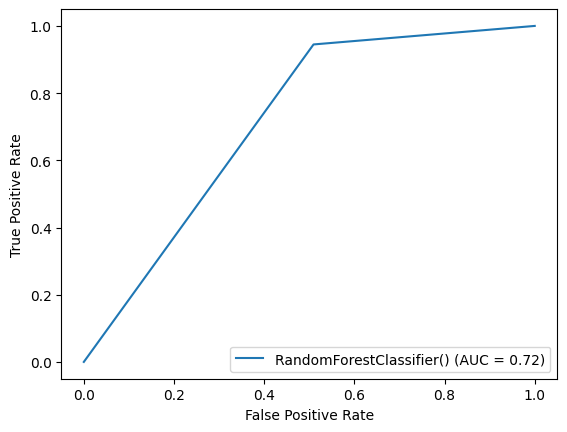

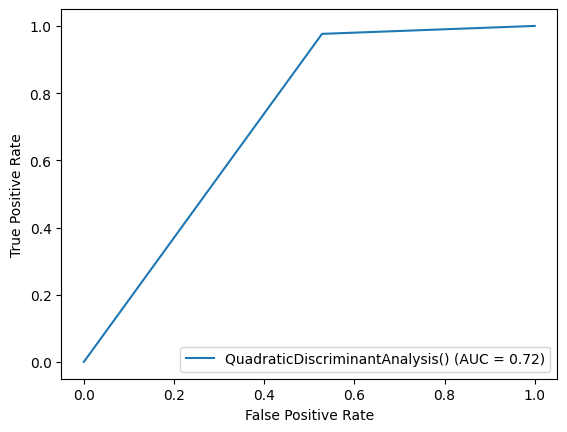

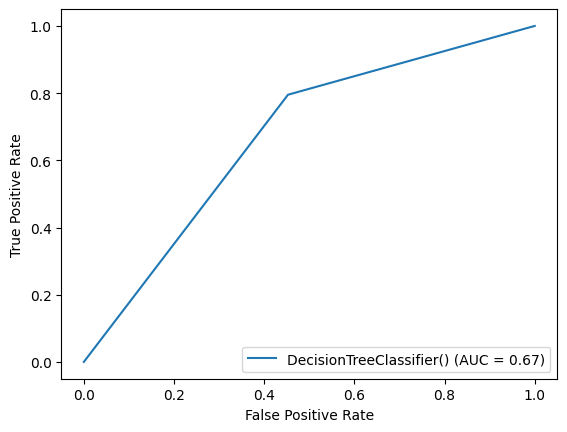

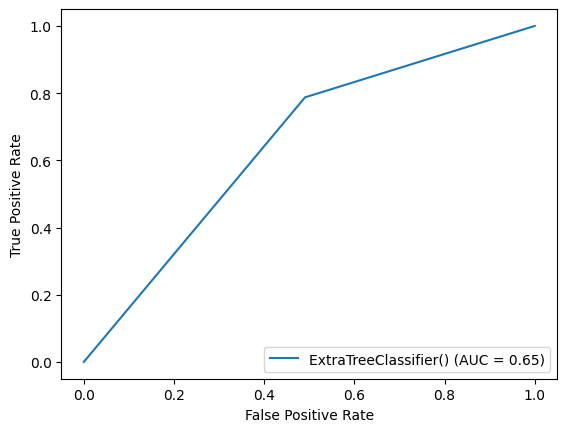

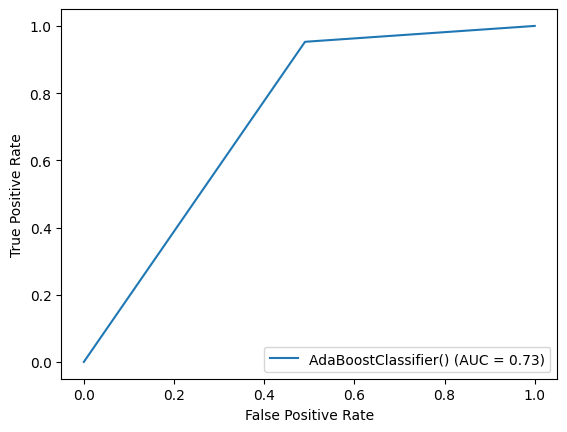

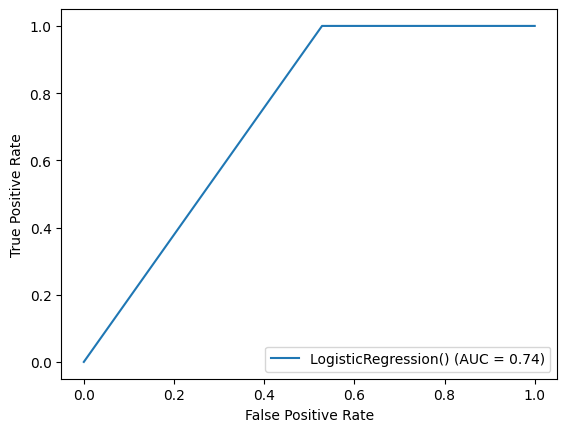

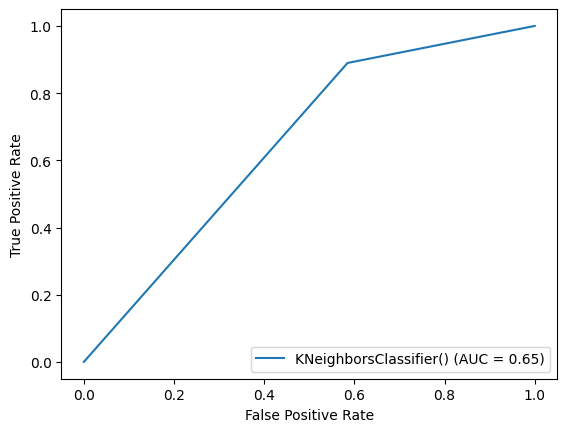

In [52]:
name=[]
accuracy=[]
AUC=[]
Recall =[]
Precision =[]
F1 =[]
head = 12
for model in classification[:head]:
    start = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_time = time() - start
    start = time()
    predict_time = time()-start
    #print(model)
    name.append(model)
    #print("\tAccuracy Score:", accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    #print("\tConfusion Matrix:", confusion_matrix(y_test, y_pred))
    AUC.append(metrics.roc_auc_score(y_test, y_pred))
    Recall.append(metrics.recall_score(y_test, y_pred))
    Precision.append(metrics.precision_score(y_test, y_pred))
    F1.append(metrics.f1_score(y_test, y_pred))
    score = cross_val_score(model,x_train, y_train)
    #print(score)
    #print(score.mean())
    #print("Difference btw accurancy and CV score is  ",accuracy_score(y_test, y_pred) - score.mean())
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
    display.plot()
    #print("\tClassification Report:", classification_report(y_test, y_pred))
    print()

In [53]:
data=pd.DataFrame()
data['Model']=name
data['accuracyscore']=accuracy
data['AUC']=AUC
data['Recall'] =Recall
data['Precision'] =Precision
data['F1']=F1

In [54]:
data

,Model,accuracyscore,AUC,Recall,Precision,F1
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.811111,0.717724,0.944882,0.816327,0.875912
1,QuadraticDiscriminantAnalysis(),0.827778,0.724038,0.976378,0.815789,0.888889
2,DecisionTreeClassifier(),0.722222,0.671223,0.795276,0.808000,0.801587
3,ExtraTreeClassifier(),0.705556,0.648418,0.787402,0.793651,0.790514
4,"(DecisionTreeClassifier(max_depth=1, random_st...",0.822222,0.731095,0.952756,0.823129,0.883212
5,LogisticRegression(),0.844444,0.735849,1.000000,0.819355,0.900709
6,KNeighborsClassifier(),0.750000,0.652429,0.889764,0.784722,0.833948


we see that QuadraticDiscriminantAnalysis and LogisticRegression are giving good results will work on hyper parameter and smot 

# Hyperparameter tunning

Quadratic Discriminant Analysis

In [55]:
params={'priors':[[0.3,0.7]],
        'reg_param':[0.1,0.2],
        'store_covariance':[True, False],
        'tol':[None,0.0001,0.001,0.01]}

In [56]:
a=RandomizedSearchCV(QuadraticDiscriminantAnalysis(),params,cv=10,n_jobs=-2)
a.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-2,
                   param_distributions={'priors': [[0.3, 0.7]],
                                        'reg_param': [0.1, 0.2],
                                        'store_covariance': [True, False],
                                        'tol': [None, 0.0001, 0.001, 0.01]})

In [57]:
print(a.best_estimator_)
print(a.best_params_)
print(a.best_score_)

QuadraticDiscriminantAnalysis(priors=[0.3, 0.7], reg_param=0.2)
{'tol': 0.0001, 'store_covariance': False, 'reg_param': 0.2, 'priors': [0.3, 0.7]}
0.7976190476190476


In [58]:
qd=QuadraticDiscriminantAnalysis(priors=[0.3, 0.7], reg_param=0.2)
qd.fit(x_train,y_train)
p=qd.predict(x_test)

In [59]:
score=cross_val_score(qd,x,y,cv=10)

In [60]:
print(accuracy_score(y_test, p))
print(confusion_matrix(y_test, p))

0.8333333333333334
[[ 25  28]
 [  2 125]]


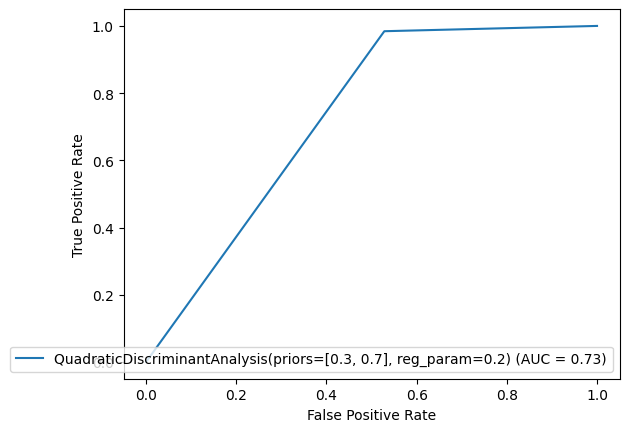

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, p)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=qd)
display.plot();

Logistic Regression

In [62]:
params={'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C':[100, 10, 1.0, 0.1, 0.01],
        'dual':[True, False],
        'class_weight':['dict' , 'balanced'],
        'max_iter':[1,10,20,50,90],
        'multi_class':['auto', 'ovr', 'multinomial']
       }

In [63]:
b=RandomizedSearchCV(LogisticRegression(),params,cv=10,n_jobs=-2)
b.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-2,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'class_weight': ['dict', 'balanced'],
                                        'dual': [True, False],
                                        'max_iter': [1, 10, 20, 50, 90],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [64]:
print(b.best_estimator_)
print(b.best_params_)
print(b.best_score_)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=50,
                   multi_class='ovr', penalty=None, solver='saga')
{'solver': 'saga', 'penalty': None, 'multi_class': 'ovr', 'max_iter': 50, 'dual': False, 'class_weight': 'balanced', 'C': 0.01}
0.726190476190476


In [70]:
lr=LogisticRegression(C=0.01, class_weight='balanced', max_iter=50,multi_class='ovr', penalty=None, solver='saga')
lr.fit(x_train,y_train)
p1=lr.predict(x_test)

In [71]:
score=cross_val_score(lr,x,y,cv=10)

In [72]:
print(accuracy_score(y_test, p1))
print(confusion_matrix(y_test, p1))

0.8
[[ 28  25]
 [ 11 116]]


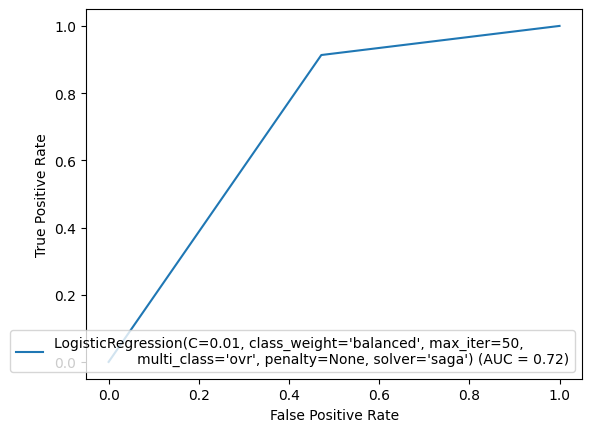

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, p1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=lr)
display.plot();

In [69]:
import joblib
joblib.dump(qd,'qd_loan_application.pkl')

['qd_loan_application.pkl']